Godfrey Beddard 'Applying Maths in the Chemical & Biomolecular Sciences an example-based approach' Chapter 9

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                         # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

# Chapter 9 Fourier Series and Transforms

This chapter describes several related topics: the Fourier series and Fourier transforms, as well as autocorrelations, convolutions, and their numerical calculation. 

Fourier series are used in solving partial differential equations, as explained in Chapter 10.5, for example, the diffusion and Schroedinger equation. Fourier transforms are used to produce every NMR spectrum, MRI scan, X-ray structure, and IR spectrum recorded; a good grasp of this topic is therefore essential for the molecular scientist. 

In many experiments the measuring instrument distorts the data and, in this case, what is measured is convoluted with the response of the instrument. Here Fourier transforms can unravel the data to produce the true response. At the end of the chapter a different type of transform, the Hadamard transform is also described and some examples of its use in time-resolved measurements, such as time-resolved kinetics and x-ray diffraction, given.

## 1 Motivation and concept

The Taylor and Maclaurin series reconstruct functions as an infinite series in the powers $x^n$, and the coefficients needed to do this are the derivatives of the function. These series have rather tight restrictions placed upon them; the function must be differentiable $n$ times over and the remainder must approach zero. These are described in Chapter 5. In a Fourier series, the expansion is performed instead, as trigonometric series in sines and cosines, with two sets of coefficients, $a_n$ and $b_n$, to describe the $n^\text{th}$ term, and which are evaluated by integration. The series formally extends to infinity, but in practice, at most only a few tens of terms are needed to replicate most functions to an acceptable level of approximation. The advantage of using a Fourier rather than a Taylor/Maclaurin series is that a wide class of functions can be described by the series, including discontinuous ones. However, by their very nature, Fourier series can only represent _periodic functions_, and this must not be forgotten. Periodic means that the function repeats itself; the repeat interval is normally taken to be $-\pi$ to $+\pi$ but can be extended to the range $-L$ to $L$ and $L$ can even be made infinite.

To illustrate that it is possible to make an arbitrary shaped function by adding a number of sine and cosine waves, four such waves are shown in Fig.1. It is possible to imagine, without any difficulty, that waveforms that are more complex can be formed by using more sine or cosine terms. The lowest and most complicated waveform is simply the sum of the individual waves, and repeats itself with a period of 2$\pi$. This waveform could be the signal that is measured on an oscilloscope or spectrometer and recorded on a computer. It might alternatively, be part of an image that is formed from adjacent columns of different waveforms. Periodic components present in a signal represent information in the waveform or image can be retrieved by performing a Fourier transform. This unravelling process is discussed later on but now the Fourier series is considered.

<img src = 'fourier-fig1.png' alt='Drawing' style='width:300px;'/>

**Fig 1**. A complex and _periodic_ waveform or function is constructed out of the sum of sine and/or cosine waves. The complicated waveform, repeats itself with a period of 2$\pi$. In the Fourier series, the reconstruction of this waveform will require many more sine and cosine terms to reconstruct its form than are used to generate it, because the Fourier series only represents a function _exactly_ when an infinite number of terms are included in the summation.

## 1.1 The Fourier Series.

A Fourier series aims to reconstruct a function, such as a waveform, using the weighted sums of sine and cosine functions or their exponential representations. The great importance and usefulness of the Fourier series is that they represents the best fit, in a least-squares way, to a function $f(x)$ because $\displaystyle \int_{-L}^{L}[f(x)-g(x)]^2dx$ is minimized when $g(x)$ is the Fourier series expansion of $f(x)$.

Because the Fourier series can extend to infinity, many more sine and cosine terms can be used to exactly reproduce a waveform, such as that shown in Fig. 1, than were used to produce it in the first place. The Fourier series cannot somehow magically pick out just those sine and cosine waves used to make the original function, therefore very many terms each with a unique frequency are needed to faithfully reconstruct a waveform. 

If the waveform shown in Fig. 1 were truncated so that it was zero outside $x = \pm \pi$, for example, then its Fourier series would have to match this new waveform which suddenly becomes zero and do so a series must contain a sufficiently large number terms  not only to cancel out to zero outside the range $x = \pm \pi$, but also to reproduce the function inside the range.  

Suppose that, over the range $\pm\pi$, a Fourier series $g(x)$ approximates a 'victim' or target function $f(x)$, which might be $x^3$ or $\displaystyle (e^{-x} - 1)^2$ or any 'normal' function, then the Fourier series $g(x)$ that approximates the true function $f(x)$ can be written down in general and in quite a straightforward manner and is

$$\displaystyle  g(x) = \frac{a_0}{2}+ \sum\limits_{n=1}^\infty a_n\cos(nx) + \sum\limits_{n=1}^\infty b_n\sin(nx)   \tag{1}$$

where $g(x)$ approximates $f(x)$. The summations start at index $n$ = 1, and $n$ is a positive integer. The $a_n$ and $b_n$ coefficients are the integrals

$$\displaystyle   a_n= \frac{1}{\pi}\int\limits_{-\pi}^{+\pi}f(x)\cos(nx)dx \qquad  (n \ge 0) \tag{2} $$
$$\displaystyle   b_n= \frac{1}{\pi}\int\limits_{-\pi}^{+\pi}f(x)\sin(nx)dx \qquad  (n \gt 0) \tag{3} $$

which are normalized by 1/$\pi$. 

When the number of terms in the series is large, then $g(x) \rightarrow f (x)$, and when infinite, $g(x) = f (x)$. At each value of $x$, the Fourier series consists of a constant term, $a_0$/2 plus the sum of an infinite number of oscillating terms in integer multiples of $x$. Notice, that the target function $f(x)$ appears as part of the expansion coefficients only, and must, therefore, be capable of being integrated. The target function $f(x)$ determines the weighting to be placed on each term in the expansion, and this is how information about the shape of $f(x)$ is included in the expansion.

If $f(x)$ is periodic in time, then the variable $x$ would normally be changed to $\omega t$ where $\omega = 2\pi\nu$ is the angular frequency in units of radian s$^{-1}$, and $\nu$ is the frequency in s$^{-1}$. If the dimension is spatial, then $x$ is often replaced with $2\pi x/L$ of which $2\pi/L$ can be interpreted as a spatial frequency, with units of radians m${-1}$ by analogy with 'normal' frequencies. Often this spatial frequency is called the wavevector and given the symbol $k$.

Before a worked example, it is worthwhile examining limits other than $\pm\pi$, describe the exponential form of the series and also simplifying some series using symmetry. The $a_n$ and $b_n$ constants are also derived.

### 1.2 Series limits from -$L$ to $L$

Over the range $−L$ to $L$, the equations to use for $f(x)$ are similar to equations (1)–(3) but $x$ is
changed to $\pi x/L$. The series is

$$\displaystyle  g(x) = \frac{a_0}{2}+ \sum\limits_{n=1}^\infty a_n\cos \left(\frac{n\pi x}{L}\right) + \sum\limits_{n=1}^\infty b_n\sin\left(\frac{n\pi x}{L}\right)   \tag{4}$$

and the coefficients are changed similarly,

$$\displaystyle   a_n= \frac{1}{L}\int\limits_{-L}^{L}f(x)\cos \left(\frac{n\pi x}{L}\right)dx \qquad  (n \ge 0) \tag{5} $$
$$\displaystyle   b_n= \frac{1}{L}\int\limits_{-L}^{L}f(x)\sin \left(\frac{n\pi x}{L}\right)dx \qquad  (n \gt 0) \tag{6} $$

Notice that the arguments, limits, and normalization are each changed compared to those when the range is $\pm \pi$. The integral now has limits $\pm L$ instead of $\pm \pi$, and normalization 1/$L$ rather than 1/$\pi$.

### 1.3 Exponential representation

Because the sine and cosine functions can be represented as sums and differences of complex exponential terms, for example, $\displaystyle \cos(x) = (e^{ix} + e^{-ix})/2$, the most general way of describing the Fourier series is to use the complex exponential form;

$$\displaystyle g(x) = \sum\limits_{n=-\infty}^\infty c_ne^{+i\, n\pi x/L}    \tag{7}$$

and the coefficients become

$$\displaystyle c_n=\frac{1}{2L}\int\limits_{-L}^L f(x)e^{-i\,n\pi x/L}dx    \tag{8} $$

Note the change in sign and limits in the second exponential, and that $i=\sqrt{-1}$. The set of coefficients $c_n$, are sometimes called the _amplitude spectrum_ of the transform. Note also that for practical purposes the expansion $g(x)$, and the true function $f(x)$  are considered equivalent.

### 1.4 Deriving the integral describing the $a$ and $b$ coefficients

The integrals describing the coefficients $a_n$ are obtained by multiplying each term in the Fourier series by $\cos(mx)$, where $m$ is an integer, then integrating term by term using the orthogonality of sine and cosine integrals as necessary. The coefficients $b_n$ can be obtained similarly by multiplying the series by $\sin(mx)$ and integrating.

First, the form of the cosine integrals is examined. The integrals containing a product of sine and cosine are all zero for any $n$ and $m$ because the integral has 'odd' symmetry because of the sine, and the limits are symmetrical;

$$\displaystyle  \int\limits_{-\infty}^{+\infty}\cos(mx)\sin(nx)dx = 0  \tag{9}$$

To convince you that the symmetry makes the integral zero, which is the area under the curve, a curve is plotted below, see figure 2. The curve, while complicated, is inverted about $x$ = 0 so that the area $\gt$ 0 is equal and opposite to that $\lt$ 0. More details on odd and even functions is given in the next section.

<img src='fourier-fig1a.png' alt='Drawing' style='width:350px;'/> 
Figure 2. An odd function such as shown above has zero integral when evaluated over a symmetrical region about zero.
____

The product of two cosines makes the integral

$$\displaystyle \int\limits_{-\pi}^\pi \cos(mx)\cos(nx)dx = \pi\delta_{n,m}   \tag{10}$$

where $m$ and $n$ are integers and the (Kronecker) delta function $\delta_{n,m}$ is zero only if $n \ne m$, and is $1$ if $n = m$.

To calculate the $a_n$ coefficients, $f(x)$ is represented as the Fourier series $g(x)$

$$\displaystyle  f(x) \approx g(x) = \frac{a_0}{2}+ \sum\limits_{n=1}^\infty a_n\cos(nx) + \sum\limits_{n=1}^\infty b_n\sin(nx) \tag{11}$$

and this is now  multiplied by $\cos(mx)$ and integrated. The cosine integrals with $m\gt$ 0 are,

$$\int\limits_{-\pi}^\pi f(x) \cos(mx)dx = \frac{a_0}{2}\int\limits_{-\pi}^\pi \cos(mx)dx +\int\limits_{-\pi}^\pi \left [\sum\limits_{n=1} a_n\cos(nx)+ \sum\limits_{n=1} b_n\sin(nx ) \right] \cos(mx)dx \tag{12}$$

These integrals can be easily evaluated: The first is zero by symmetry, and by direct integration, $\displaystyle \int_{-\pi}^\pi \cos(mx)dx=\left. \frac{\sin(mx)}{m}\right|_{-\pi}^\pi =0$. The integral containing $b_n$ is given by eqn. 10 and is zero also when $n \ne m$, therefore eqn. 12 becomes


$$\displaystyle \int\limits_{-\pi}^\pi f(x) \cos(mx)dx =\pi\sum\limits_{n=1}a_n\delta_{n,m} = \pi a_n$$

because the delta function picks out just one term from the summation. Rearranging gives

$$\displaystyle a_n = \frac{1}{\pi}\int\limits_{-\pi}^\pi f(x) \cos(mx)dx   \quad (n \gt 0) $$

The index has been changed to $n$ from $m$ because both $n$ and $m$ are integers and only one index is needed; equation (11) was written initially with $n$, so this is again chosen. When $m = n =$ 0, equation (12) becomes

$$\displaystyle \int\limits_{-\pi}^\pi f(x)dx =\frac{a_0}{2}\int\limits_{-\pi}^\pi 1dx=\pi a_0 $$

making $\displaystyle a_0= \pi^{-1}\int\limits_{-\pi}^\pi f(x)dx$. Similar arguments lead to the calculation of $b_n$.

### 1.5 Odd and even functions

When functions are either even or odd, the Fourier series is simplified to cosine or sine series respectively. An even function has the property $f (-x) = f (x)$ and the sine integration (eqn. 6) producing the Fourier coefficient $b_n$ is odd and therefore $b_n$ = 0, but only because the integration limits are symmetrical. The cosine integral (eqn. 5) is not zero, and can be written as

$$\displaystyle a_n=\frac{2}{\pi}\int\limits_0^\pi f(x)\cos(nx)dx   \tag{13}$$

When $f(x)$ is odd $f(-x) = -f(x)$, the opposite situation arises; $a_n$ = 0 and only the sine terms remain;

$$\displaystyle b_n=\frac{2}{\pi}\int\limits_0^\pi f(x)\sin(nx)dx   \tag{14}$$

In cases when $f(x)$ is neither odd nor even, for example $f(x) = \pi/2 - x$, both coefficients have to be evaluated.

As an example, consider calculating the series of $f(x) = x^2$ over the range $\pm \pi$. Because this is an even function, the sine integral should be zero and $b_n$ = 0. The $a$ coefficients are

$$\displaystyle a_n=\frac{2}{\pi}\int\limits_0^\pi x^2\cos(nx)dx  $$

and when $n$ = 0,

$$\displaystyle a_0=\frac{2}{\pi}\int\limits_0^\pi x^2dx =\frac{2}{3}\pi^2 $$

When $n\gt$ 0, $a_n$ can be evaluated using integration by parts.

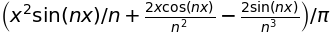

In [2]:
#using SymPy to do the indefinite integration
x ,n = symbols('x n', positive = True)
func = x**2*cos(n*x)/pi
an = integrate(func,x, conds='none')      # coefficients a_n
an

Adding the limits $\pm \pi$ produces zero for the sine terms and the remaining cosine produces $\displaystyle a_n=(-1)^n\frac{4}{n^3}$. All the $b_n$=0 thus using eqn. 4. the Fourier series for $x^2$ is

$$\displaystyle  x^2 \approx g(x)= \frac{\pi^2}{3}-4\cos(x)+\cos(2x)-\frac{4}{9}\cos(3x) \cdots \ = \frac{\pi^2}{3}+4\sum\limits_{n=1}^\infty \frac{(-1)^n}{n^2}\cos(nx)     \tag{15} $$

which, as shown in the next figure, is a good representation of $x^2$. The following Python code is included as an example of a Fourier series calculation

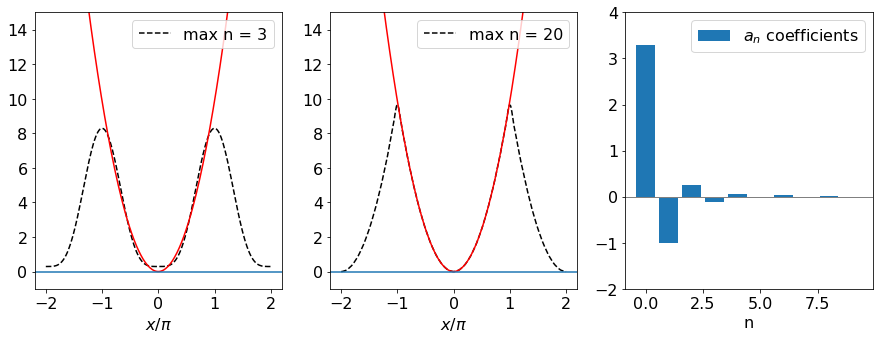

In [3]:
fig1= plt.figure(figsize=(12.5, 5.0))
plt.rcParams.update({'font.size': 16})  # set font size for plots
ax0 = fig1.add_subplot(1,3,1)
ax1 = fig1.add_subplot(1,3,2)
ax2 = fig1.add_subplot(1,3,3)

gx = lambda x, k : (np.pi**2)/3.0 + 4.0*sum( (-1)**n *np.cos(n*x)/n**2 for n in range(1,k)) # series summation

x = np.linspace(-2*np.pi,2*np.pi,200)   # define x values, -pi to pi with 200 data points

for i,ax in enumerate([ax0,ax1]):
    j = 20
    if i == 0 : j = 3      # number of terms in summation
    ax.plot(x/np.pi, gx(x,j),linestyle='dashed',color='black',label='max n = '+str(j)) # plot as x/pi , 4 terms
    ax.plot(x/np.pi,x**2,color='red')
    ax.set_xlabel(r'$x/\pi$')
    ax.set_ylim([-1,15])
    ax.axhline(0)
    ax.legend()

kk = 10
nvals = [i for i in range(kk)]   # make list of values 0, 1, 2,...
fn = lambda  n : (np.pi**2)/3.0 if n ==0 else  (-1)**n/n**2 if n >0 else 0
an = [fn(i) for i in range(kk)]
ax2.axhline(0,linewidth=1, color='grey')
ax2.bar(nvals,an,label=r'$a_n$ coefficients') 
ax2.set_ylim([-2,4])
ax2.set_xlabel('n')
ax2.legend()
plt.tight_layout()
plt.show()

**Figure 3**. Left: Plot of $x^2$ and its Fourier series to $n$ = 3 showing a poor fit to the true function. More terms produce a better fit but only over the range $\pm \pi$ as shown in the centre panel where 20 terms are included in the summation. This plot also shows how the fit is only over the range $\pm \pi$ and then it repeats itself. On the right are shown the coefficients $a_n$ and shows how rapidly their value decreases as $n$ increases.